In [109]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%config InlineBackend.figure_format = 'retina'


In [18]:
x = np.arange(-20, 20, 0.1)

In [40]:
noise = np.random.random(size=x.shape[0])*10
y = x**2 + noise 
# y = np.log(x)
# y = np.sin(x)

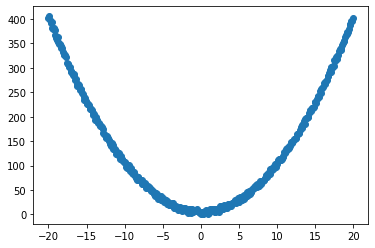

In [42]:
plt.scatter(x, y)

In [43]:
np.corrcoef(x,y)

array([[ 1.       , -0.0114983],
       [-0.0114983,  1.       ]])

In [44]:
cov = np.cov(x,y)
cov

array([[  133.66666667,   -15.8751508 ],
       [  -15.8751508 , 14260.85893324]])

In [45]:
d = np.diag(cov)
d

array([  133.66666667, 14260.85893324])

In [46]:
d = np.sqrt(d)
d

array([ 11.56143013, 119.41883827])

In [47]:
x_std = d[0]
y_std = d[1]
print(x_std, y_std)

11.561430130683249 119.41883826785775


In [48]:
cov

array([[  133.66666667,   -15.8751508 ],
       [  -15.8751508 , 14260.85893324]])

In [49]:
c  = cov / (x_std * y_std)
c

array([[ 0.09681412, -0.0114983 ],
       [-0.0114983 , 10.32907148]])

In [50]:
np.clip(c.real, -1, 1, out=c.real)

array([[ 0.09681412, -0.0114983 ],
       [-0.0114983 ,  1.        ]])

In [51]:
np.cov(x,y) / (x_std * y_std)

array([[ 0.09681412, -0.0114983 ],
       [-0.0114983 , 10.32907148]])

In [52]:
x_var

NameError: name 'x_var' is not defined

In [53]:
def my_corr(x, y):
    c = np.cov(x, y)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
    c /= stddev[:, None]
    c /= stddev[None, :]

    # Clip real and imaginary parts to [-1, 1].  This does not guarantee
    # abs(a[i,j]) <= 1 for complex arrays, but is the best we can do without
    # excessive work.
    np.clip(c.real, -1, 1, out=c.real)
    if np.iscomplexobj(c):
        np.clip(c.imag, -1, 1, out=c.imag)

In [54]:
my_corr(x, y)

# Covariance Notes
* When the covariance value is **positive** we classify the trend between $X$ and $Y$ as positive. 
* Remember, the covariance value itself is rather difficult to interpret and depends on the context (See video [here](https://youtu.be/qtaqvPAeEJY?t=710))
* For example, the covariance value does not tell us if the slope of the line representing the relationship is steep. It just tells us that the slope is positive
* It also does not tell us if the points are relatively close to the line of best fit, or relatively far. It just tells us that the slope of the relationship is positive. 
* The main thing that the covariance is used for is as a stepping stone in the computation of the correlation

# Correlation Notes
* When a straight line with a positive slope goes through our data points, correlation equals 1


In [55]:
noise = np.random.random(size=x.shape[0])*10
y = x**2 + noise 
# y = np.log(x)
# y = np.sin(x)

In [56]:
np.cov(x, y)

array([[ 1.33666667e+02, -1.14393974e+01],
       [-1.14393974e+01,  1.42756022e+04]])

In [57]:
np.corrcoef(x, y)

array([[ 1.        , -0.00828122],
       [-0.00828122,  1.        ]])

In [58]:
noise = np.random.random(size=x.shape[0])*10
y = x + noise 
# y = np.log(x)
# y = np.sin(x)

In [59]:
np.cov(x, y)

array([[133.66666667, 135.66923894],
       [135.66923894, 146.7031553 ]])

In [60]:
np.corrcoef(x, y)

array([[1.        , 0.96883563],
       [0.96883563, 1.        ]])

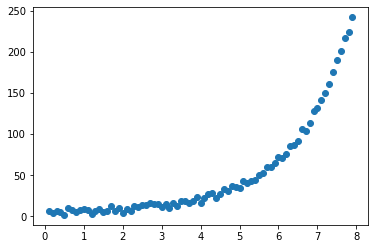

In [14]:
x = np.arange(0.1, 8, 0.1)
noise = np.random.random(size=x.shape[0])*10
y = 2**x + noise 
# y = np.log(x)
# y = np.sin(x)
plt.scatter(x, y)

In [15]:
np.cov(x, y)

array([[   5.26666667,  115.76525223],
       [ 115.76525223, 3606.88946217]])

In [16]:
np.corrcoef(x, y)

array([[1.        , 0.83993154],
       [0.83993154, 1.        ]])

Clearly, based on the above, correlation and covariance isn't a perfect representation of linearity. Or, at the very least, we must consider the correlation coefficient. 0.83 by no means correspond to a linear curve!

$$y = sin(x) + x$$ 

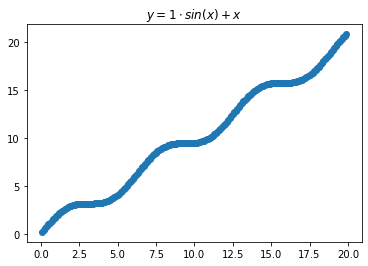

covariance:
 [[33.16666667 32.47919945]
 [32.47919945 32.28454542]]
correlation:
 [[1.         0.99256068]
 [0.99256068 1.        ]]
----------------------------------------


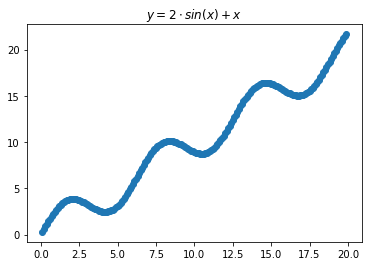

covariance:
 [[33.16666667 31.79173224]
 [31.79173224 32.38805056]]
correlation:
 [[1.         0.96999808]
 [0.96999808 1.        ]]
----------------------------------------


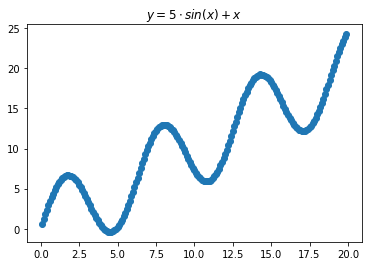

covariance:
 [[33.16666667 29.72933059]
 [29.72933059 38.61232421]]
correlation:
 [[1.         0.83075171]
 [0.83075171 1.        ]]
----------------------------------------


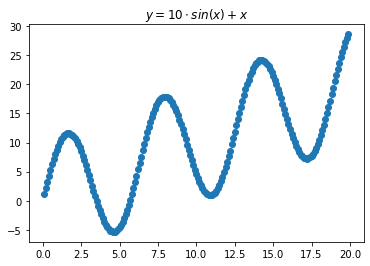

covariance:
 [[33.16666667 26.29199452]
 [26.29199452 68.69864113]]
correlation:
 [[1.         0.55080585]
 [0.55080585 1.        ]]
----------------------------------------


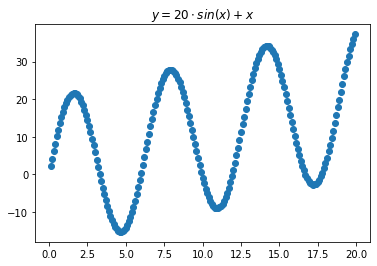

covariance:
 [[ 33.16666667  19.41732237]
 [ 19.41732237 202.79325309]]
correlation:
 [[1.         0.23676182]
 [0.23676182 1.        ]]
----------------------------------------


In [28]:
x = np.arange(0.1, 20, 0.1)
for scale in [1, 2, 5, 10, 20]:

    y = np.sin(x)*scale + x 

    plt.scatter(x, y)
    plt.title(f'$y = {scale}\cdot sin(x) + x$')
    plt.show()
    print('covariance:\n', np.cov(x, y))
    print('correlation:\n', np.corrcoef(x, y))
    print('--------'*5)

Above we see that as we increase the nonlinear component, $sin(x)$, and it begins to over power our linear component, $x$, our covariance and correlation decrease. Covariance and correlation can capture the overall linear trend in our data, even when the relationship is not fully linear (say, in this case where we have $sin(x)$ as a noise of sorts).

In other words, when covariance is described as capturing the sign of the linear relationship of two variables, it doesn't mean that the relationship can _only_ consist of a linear component. 

In [11]:
np.corrcoef(x, y)

array([[1.        , 0.55080585],
       [0.55080585, 1.        ]])

### Determine if Equivalency exists
$$\frac{cov(X, Y)}{\sigma_X \sigma_Y} = \frac{E\big[ (X - \mu_X)(Y - \mu_Y)\big]}{\sigma_X \sigma_Y} =
{E\big[ \frac{(X - \mu_X)}{\sigma_X} \frac{(Y - \mu_Y)}{\sigma_Y}\big]}
$$

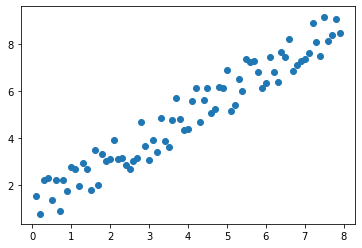

In [38]:
x = np.arange(0.1, 8, 0.1)
noise = np.random.random(size=x.shape[0])*2
y = x + noise 
plt.scatter(x, y)

In [39]:
np.cov(x, y)

array([[5.26666667, 4.97698978],
       [4.97698978, 5.04778003]])

In [40]:
np.corrcoef(x, y)

array([[1.        , 0.96526959],
       [0.96526959, 1.        ]])

In [48]:
total = 0
mu_x = x.mean()
mu_y = y.mean()

for x_val, y_val in zip(x, y):
    total += (x_val - mu_x) * (y_val - mu_y)
    
first_moment_product = total/(x.shape[0]- 1)
print(first_moment_product)

4.9769897848735045


In [50]:
total = 0
mu_x = x.mean()
mu_y = y.mean()

for x_val, y_val in zip(x, y):
    total += ((x_val - mu_x) / x.std()) * ((y_val - mu_y) / y.std())
    
first_moment_product = total/(x.shape[0])
print(first_moment_product)

0.9652695861467087


It looks at though the following equivalency exists:

$$\frac{cov(X, Y)}{\sigma_X \sigma_Y} = \frac{E\big[ (X - \mu_X)(Y - \mu_Y)\big]}{\sigma_X \sigma_Y} =
{E\big[ \frac{(X - \mu_X)}{\sigma_X} \frac{(Y - \mu_Y)}{\sigma_Y}\big]}
$$

### Histograms of $X$ and $Y$ before and after scaling and shifting

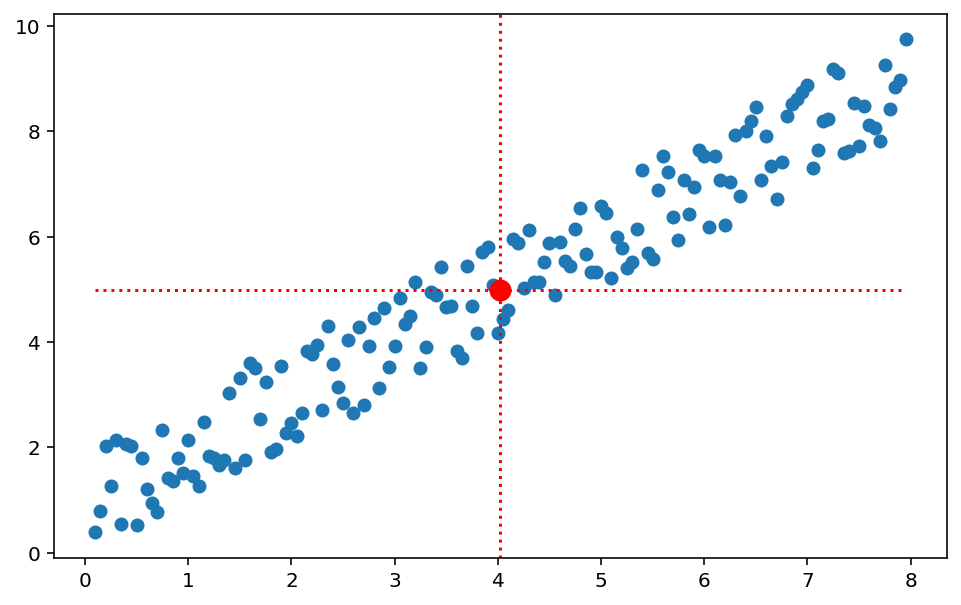

In [68]:
fig, ax  = plt.subplots(figsize=(8,5))

x = np.arange(0.1, 8, 0.05)
noise = np.random.random(size=x.shape[0])*2
y = x + noise 
ax.scatter(x, y)
ax.axvline(x.mean(), color='red', linestyle=':')
ax.plot(x, np.ones(y.shape[0]) * y.mean(),  color='red', linestyle=':')
ax.scatter(x.mean(), y.mean(), color='red', s=100)
plt.show()


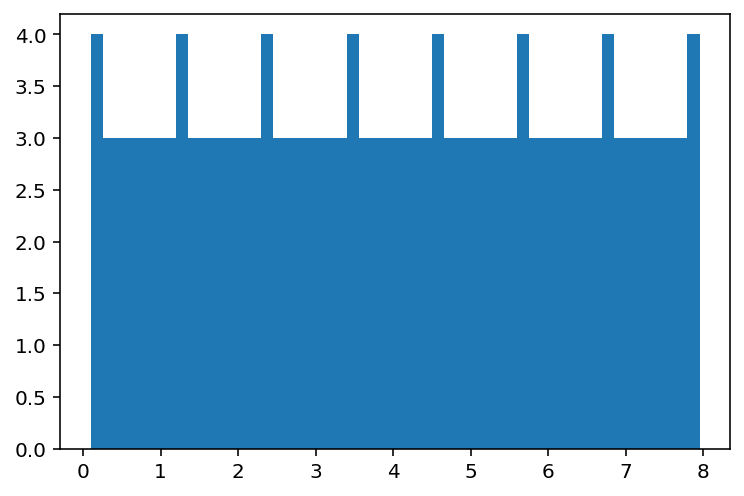

In [69]:
plt.hist(x, bins=50)
plt.show()

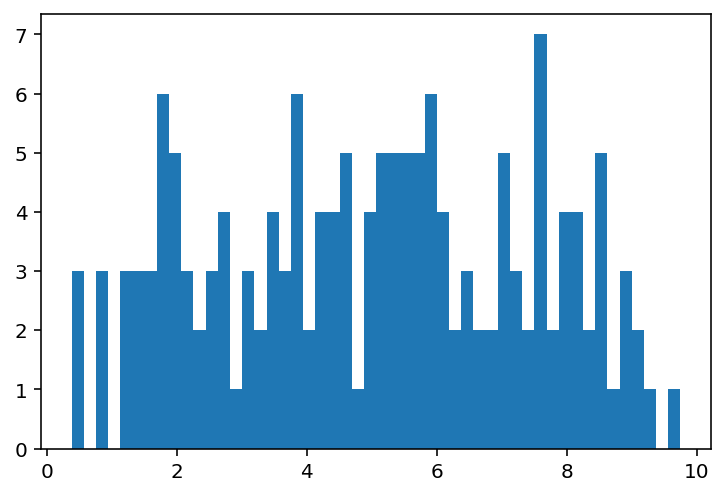

In [70]:
plt.hist(y, bins=50)
plt.show()

In [71]:
np.cov(x, y)

array([[5.23375   , 5.31086783],
       [5.31086783, 5.77526504]])

#### Shift both x and y to have mean 0

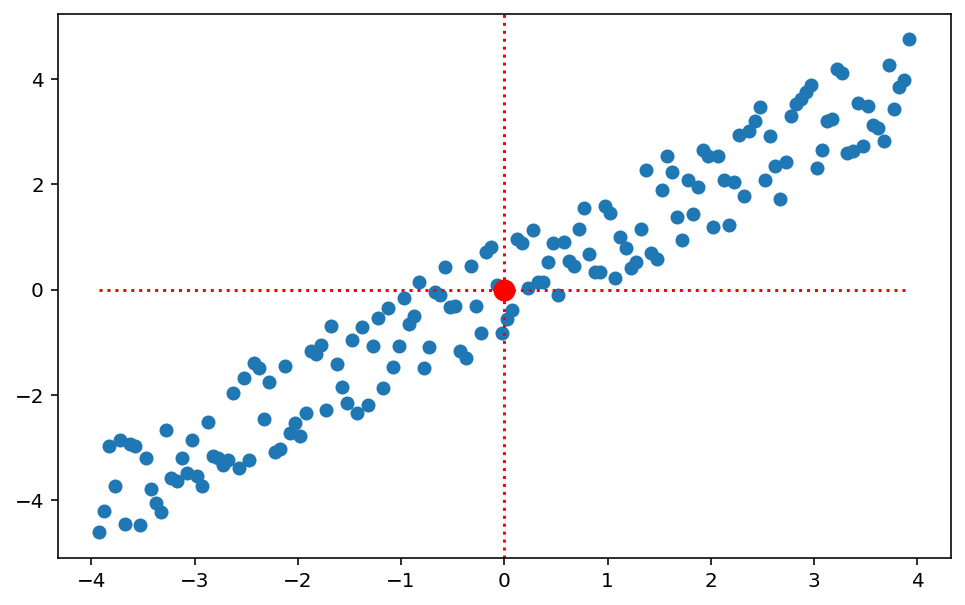

In [72]:
x = x - x.mean()
y = y - y.mean() 

fig, ax  = plt.subplots(figsize=(8,5))
ax.scatter(x, y)
ax.axvline(x.mean(), color='red', linestyle=':')
ax.plot(x, np.ones(y.shape[0]) * y.mean(),  color='red', linestyle=':')
ax.scatter(x.mean(), y.mean(), color='red', s=100)
plt.show()

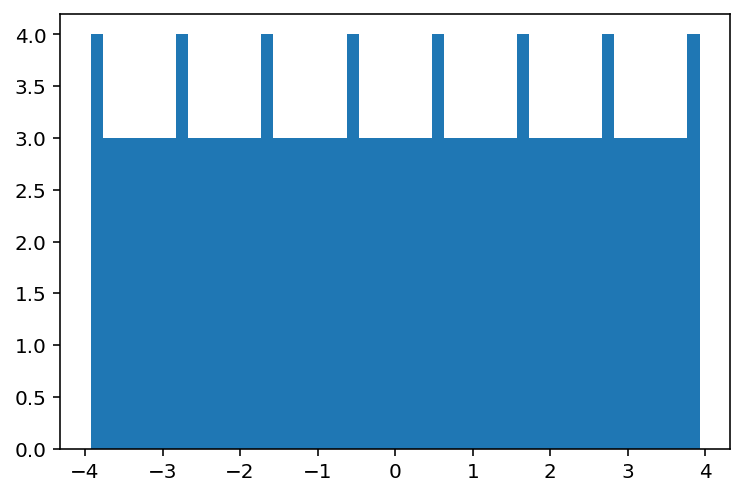

In [73]:
plt.hist(x, bins=50)
plt.show()

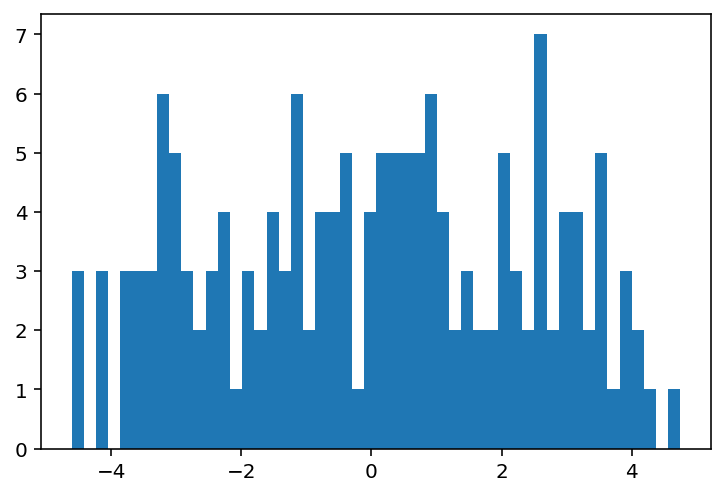

In [74]:
plt.hist(y, bins=50)
plt.show()

#### Scale by standard deviation to ensure a variance of 1

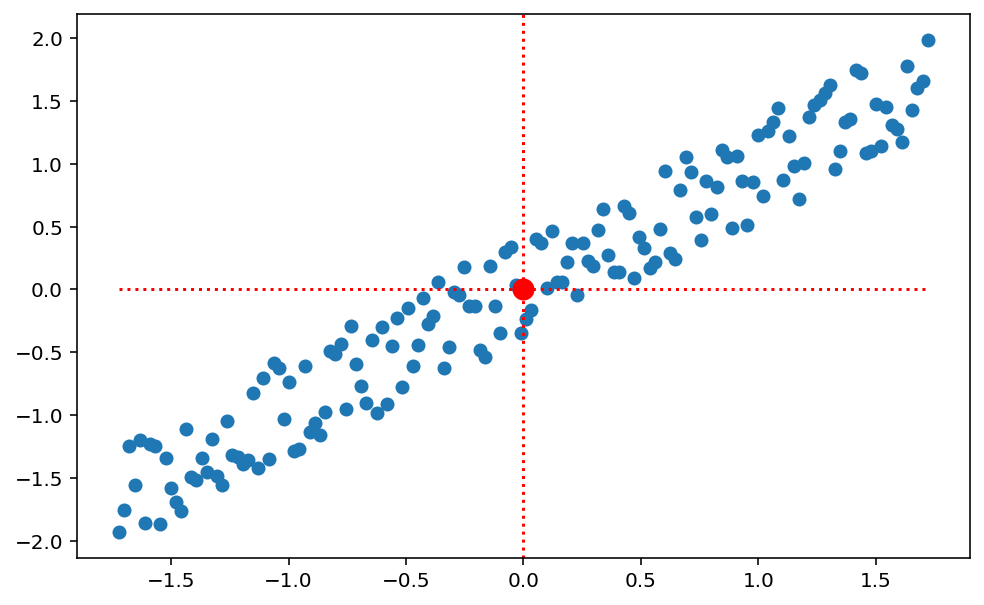

In [75]:
x = x / x.std()
y = y / y.std()

fig, ax  = plt.subplots(figsize=(8,5))
ax.scatter(x, y)
ax.axvline(x.mean(), color='red', linestyle=':')
ax.plot(x, np.ones(y.shape[0]) * y.mean(),  color='red', linestyle=':')
ax.scatter(x.mean(), y.mean(), color='red', s=100)
plt.show()

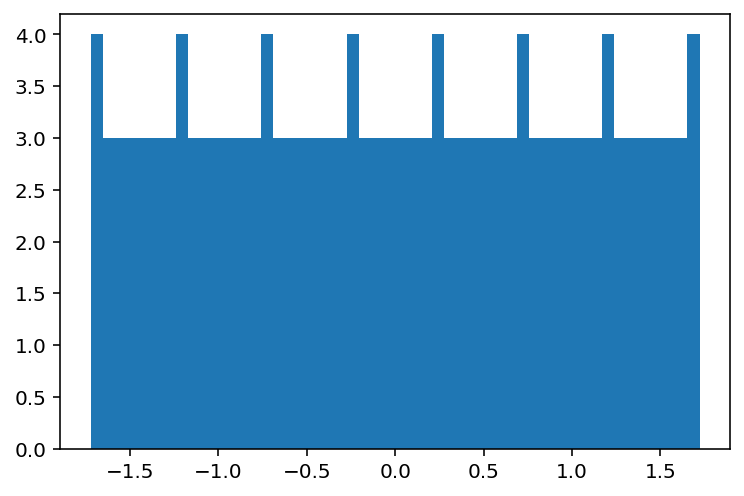

In [76]:
plt.hist(x, bins=50)
plt.show()

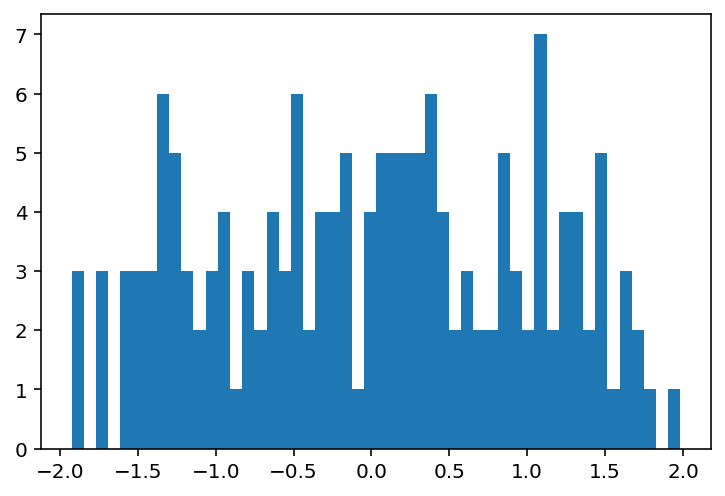

In [77]:
plt.hist(y, bins=50)
plt.show()

In [80]:
print('x standard deviation: ', x.std())
print('y standard deviation: ', y.std())

x standard deviation:  1.0
y standard deviation:  1.0000000000000002


In [85]:
x_y_prod = x * y 

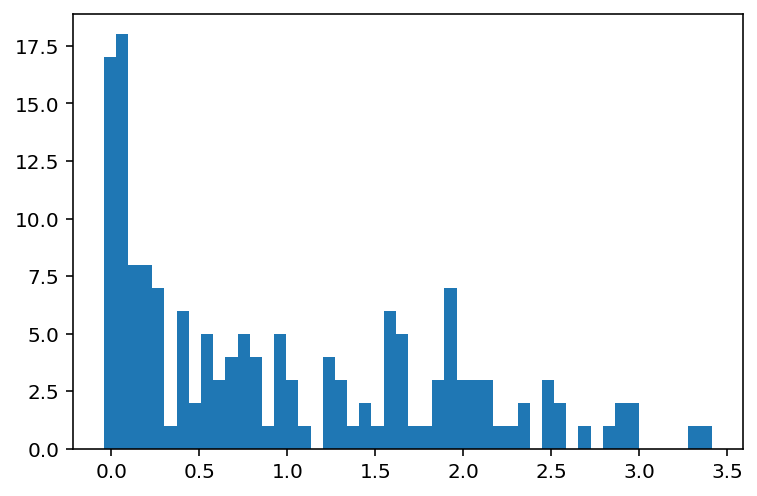

In [88]:
plt.hist(x_y_prod, bins=50)
plt.show()

In [89]:
print('Expectation of first product moment: ', x_y_prod.mean())

Expectation of first product moment:  0.9659909254833731


And, we can see that this compares perfectly with the correlation coefficient:

In [90]:
np.corrcoef(x, y)

array([[1.        , 0.96599093],
       [0.96599093, 1.        ]])

# Create an experiment to run this process with different initial $X$ and $Y$

In [134]:
def experiment(x, y):
    %matplotlib inline
    fig, ax  = plt.subplots(figsize=(8,5))
    ax.scatter(x, y)
    ax.axvline(x.mean(), color='red', linestyle=':')
    ax.plot(x, np.ones(y.shape[0]) * y.mean(),  color='red', linestyle=':')
    ax.scatter(x.mean(), y.mean(), color='red', s=100)
    plt.show()
    
    plt.hist(x, bins=50)
    plt.title('histogram of x')
    plt.show()
    plt.hist(y, bins=50)
    plt.title('histogram of y')
    plt.show()
    
    print('---------'*5 + 'shift to mean 0' + '---------'*5 )
    x = x - x.mean()
    y = y - y.mean() 

    fig, ax  = plt.subplots(figsize=(8,5))
    ax.scatter(x, y)
    ax.axvline(x.mean(), color='red', linestyle=':')
    ax.plot(x, np.ones(y.shape[0]) * y.mean(),  color='red', linestyle=':')
    ax.scatter(x.mean(), y.mean(), color='red', s=100)
    plt.show()
    
    plt.hist(x, bins=50)
    plt.title('histogram of x')
    plt.show()
    plt.hist(y, bins=50)
    plt.title('histogram of y')
    plt.show()
    
    print('---------'*5 + 'shift to std 1' + '---------'*5 )
    x = x / x.std()
    y = y / y.std()

    fig, ax  = plt.subplots(figsize=(8,5))
    ax.scatter(x, y)
    ax.axvline(x.mean(), color='red', linestyle=':')
    ax.plot(x, np.ones(y.shape[0]) * y.mean(),  color='red', linestyle=':')
    ax.scatter(x.mean(), y.mean(), color='red', s=100)
    plt.show()
        
    plt.hist(x, bins=50)
    plt.title('histogram of x')
    plt.show()
    plt.hist(y, bins=50)
    plt.title('histogram of y')
    plt.show()
        
    print('x mean: ', x.mean())
    print('y mean: ', y.mean())
    print('x standard deviation: ', x.std())
    print('y standard deviation: ', y.std())

    print('\n---------'*5 + 'First moment of product' + '---------'*5 )
    x_y_prod = x * y 
    plt.hist(x_y_prod, bins=50)
    plt.title('histogram of x*y') 
    plt.show()
    print('Expectation of first product moment: ', x_y_prod.mean())
    print('correlation matrix: ', np.corrcoef(x, y))
    sns.jointplot(x, y, kind='kde')
    
#     fig = plt.figure(figsize=(10,8))
#     ax = fig.add_subplot(111, projection='3d')

#     hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[x.min(), x.max()], [y.min(), y.max()]])

#     xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
#     xpos = xpos.ravel()
#     ypos = ypos.ravel()
#     zpos = 0

#     # Construct arrays with the dimensions for the 16 bars.
#     dx = dy = 0.5 * np.ones_like(zpos)
#     dz = hist.ravel()

#     ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

#     plt.show()

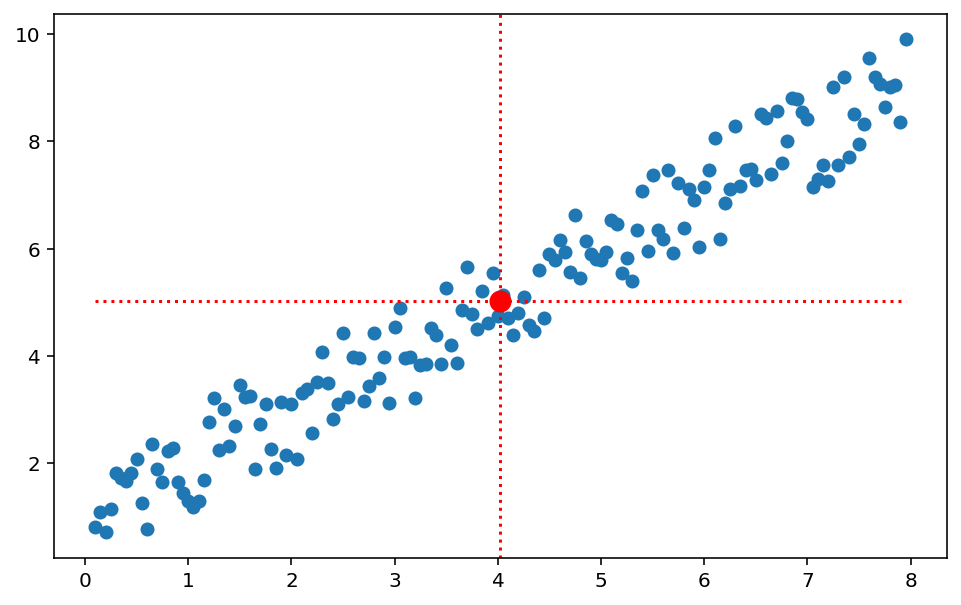

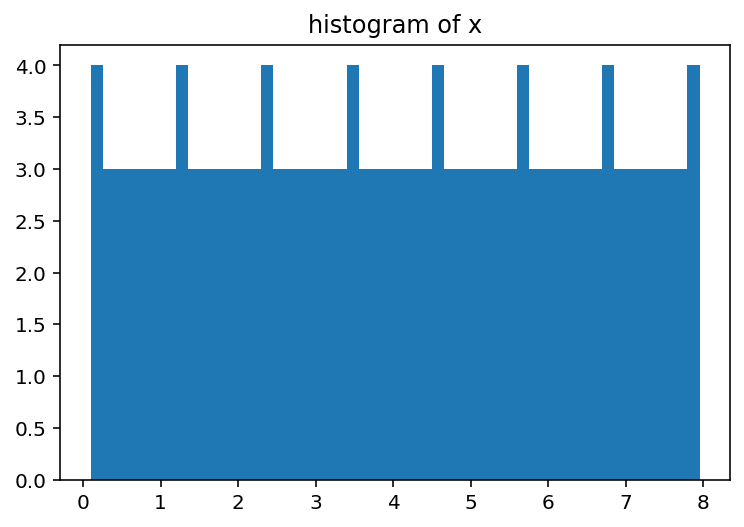

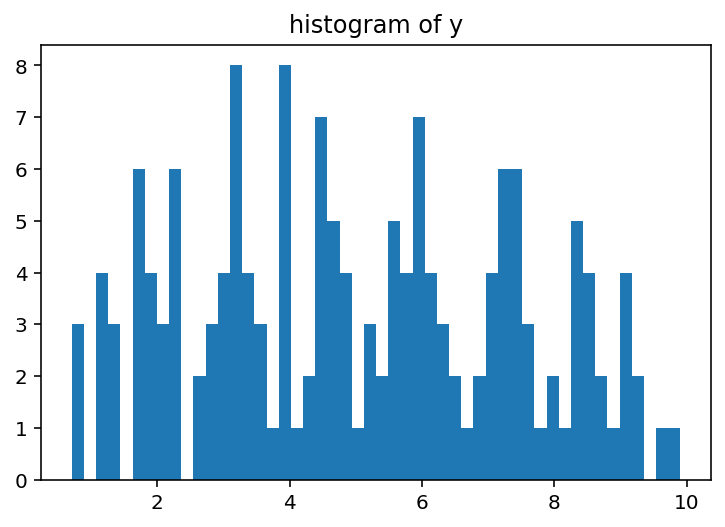

---------------------------------------------shift to mean 0---------------------------------------------


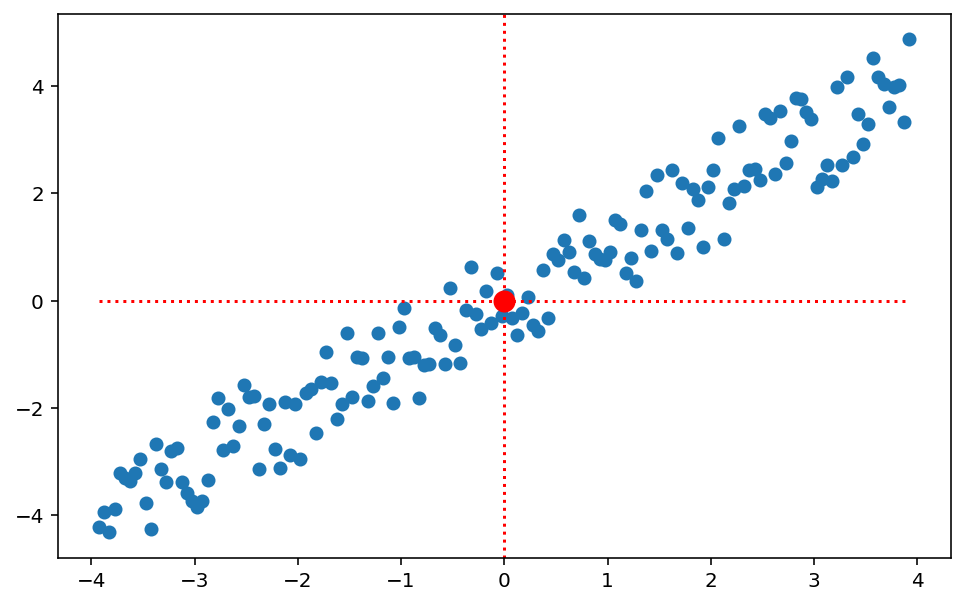

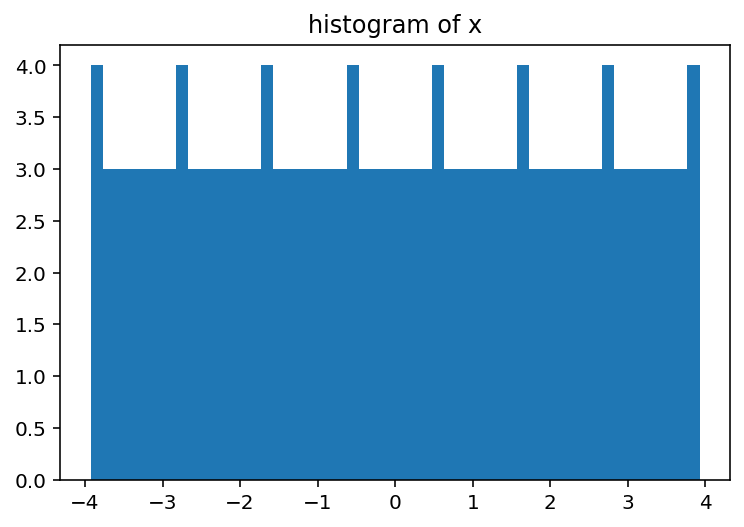

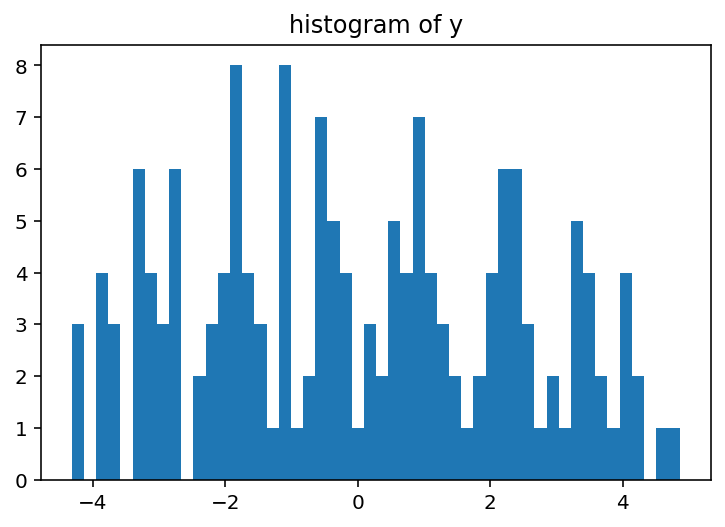

---------------------------------------------shift to std 1---------------------------------------------


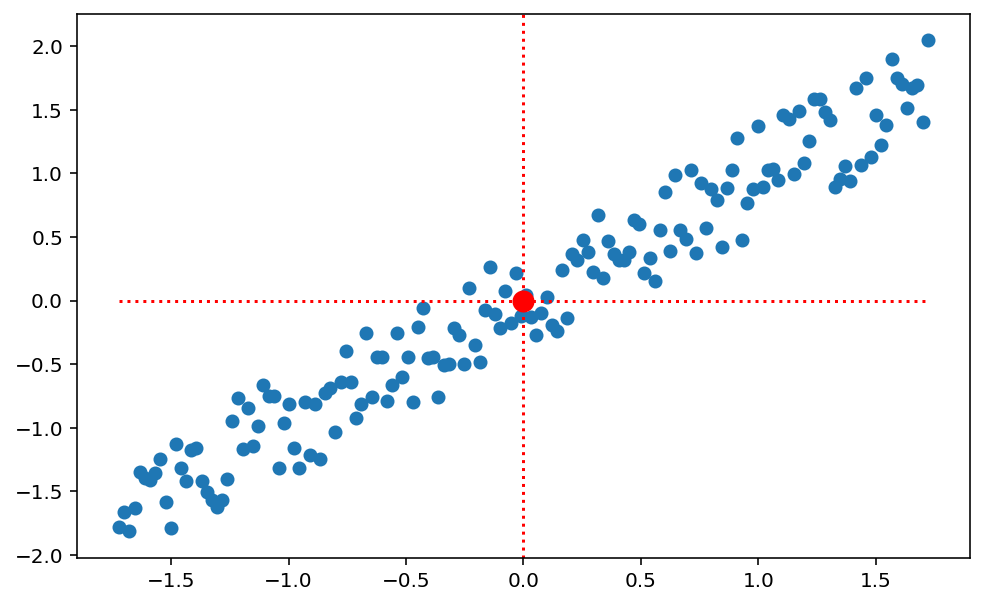

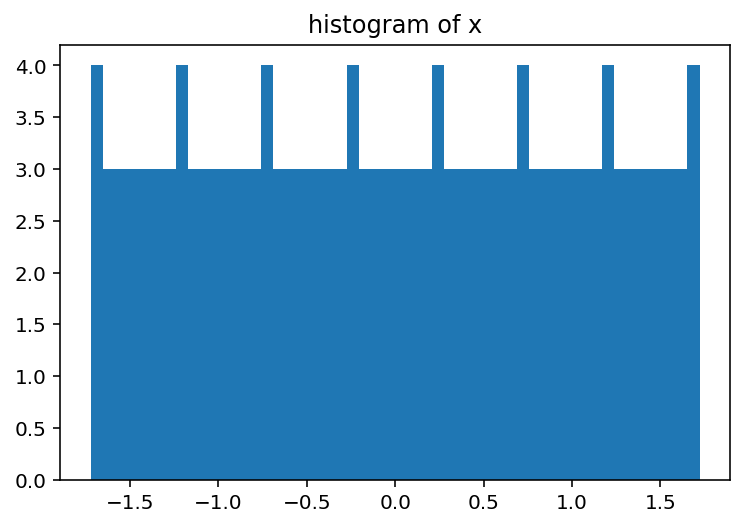

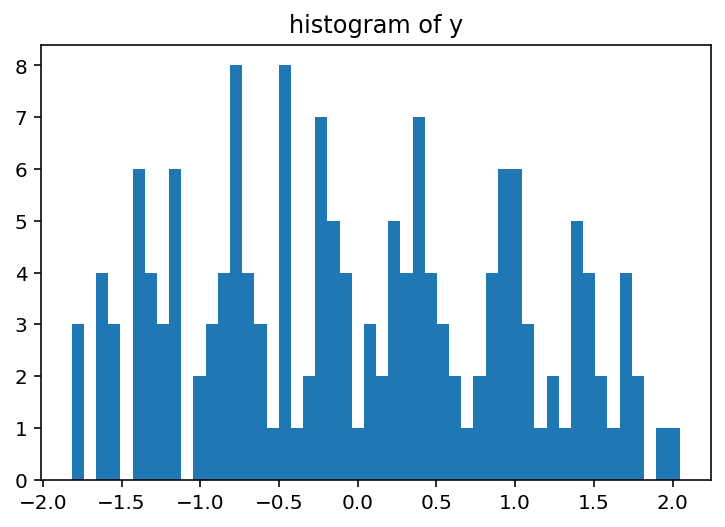

x mean:  -8.994211845064559e-17
y mean:  8.994211845064559e-17
x standard deviation:  1.0
y standard deviation:  0.9999999999999999

---------
---------
---------
---------
---------First moment of product---------------------------------------------


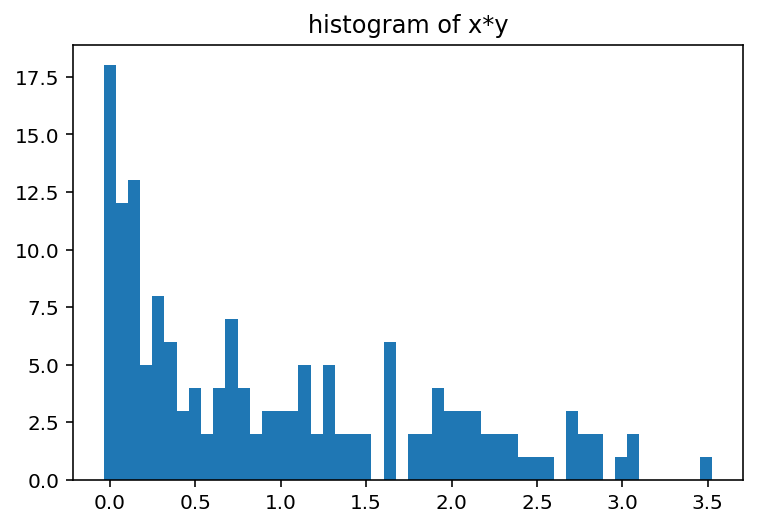

Expectation of first product moment:  0.9722424834199143
correlation matrix:  [[1.         0.97224248]
 [0.97224248 1.        ]]


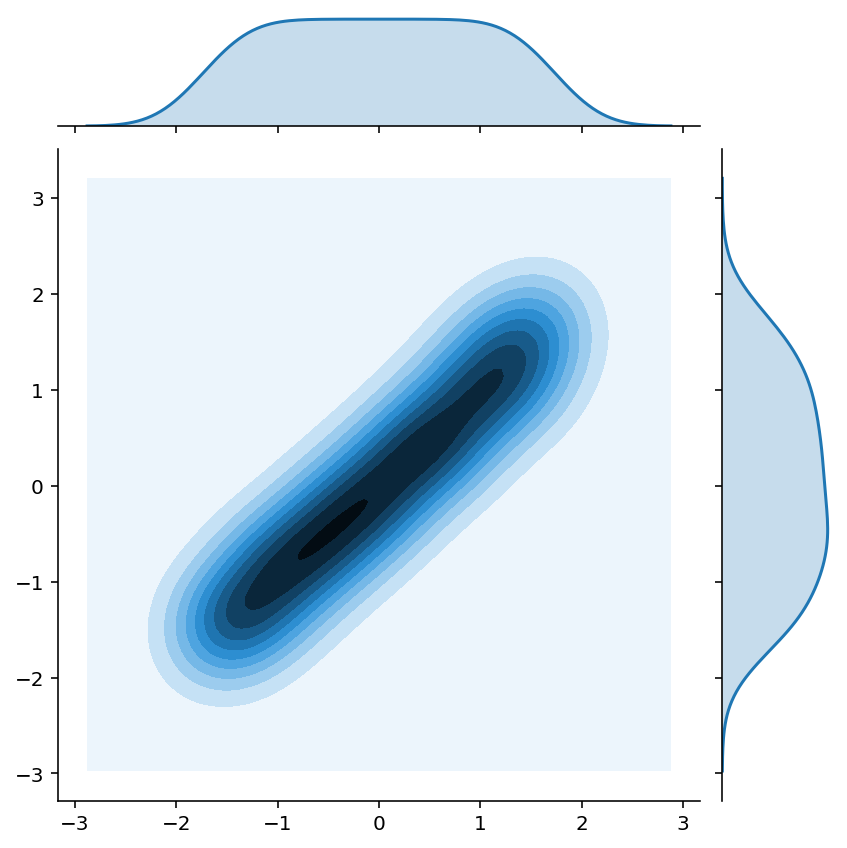

In [136]:
x = np.arange(0.1, 8, 0.05)
noise = np.random.random(size=x.shape[0])*2
y = x + noise 

experiment(x, y)

<IPython.core.display.Javascript object>


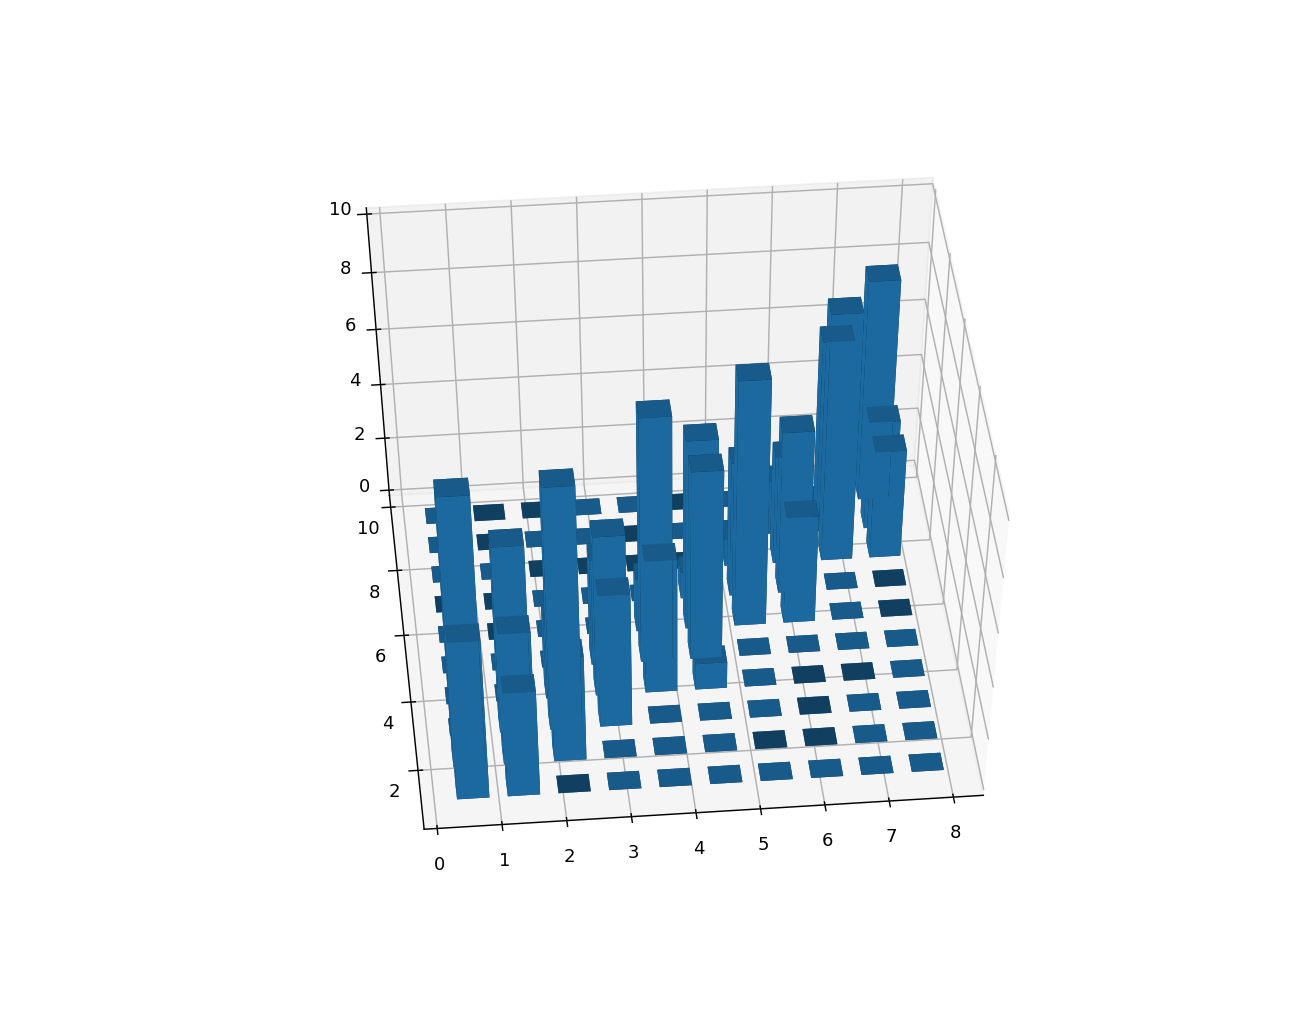

In [138]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[x.min(), x.max()], [y.min(), y.max()]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

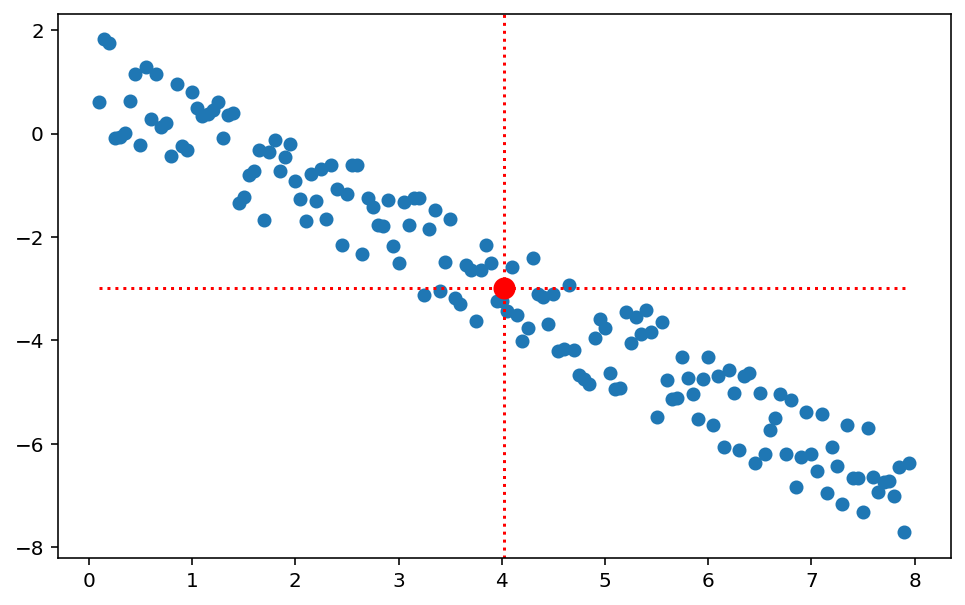

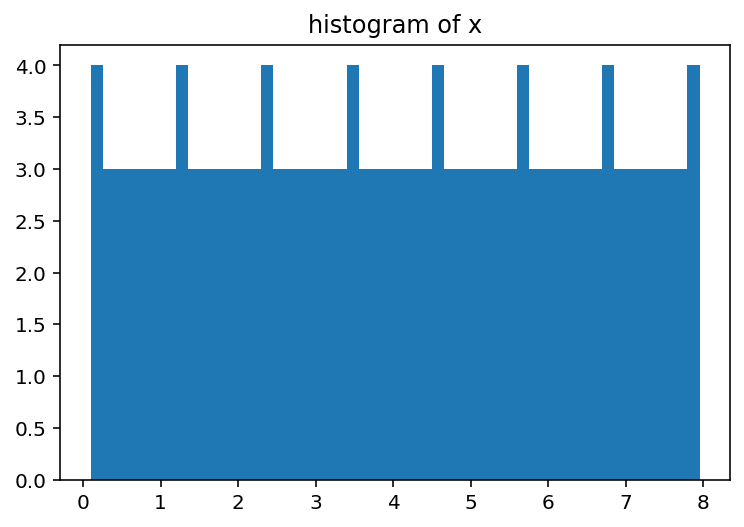

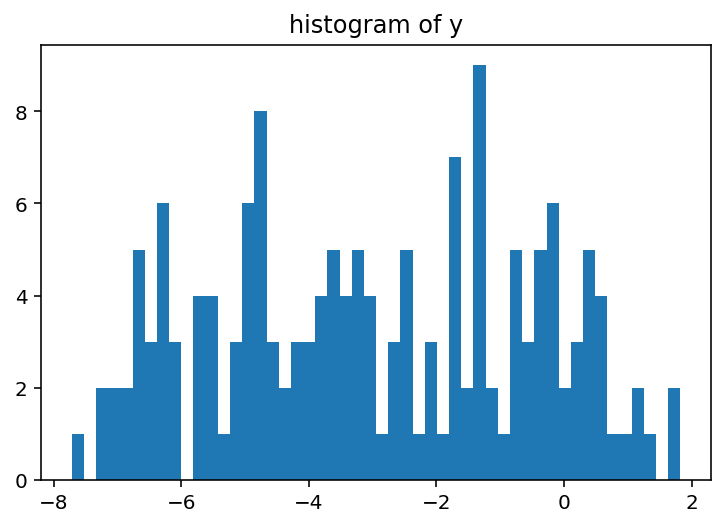

---------------------------------------------shift to mean 0---------------------------------------------


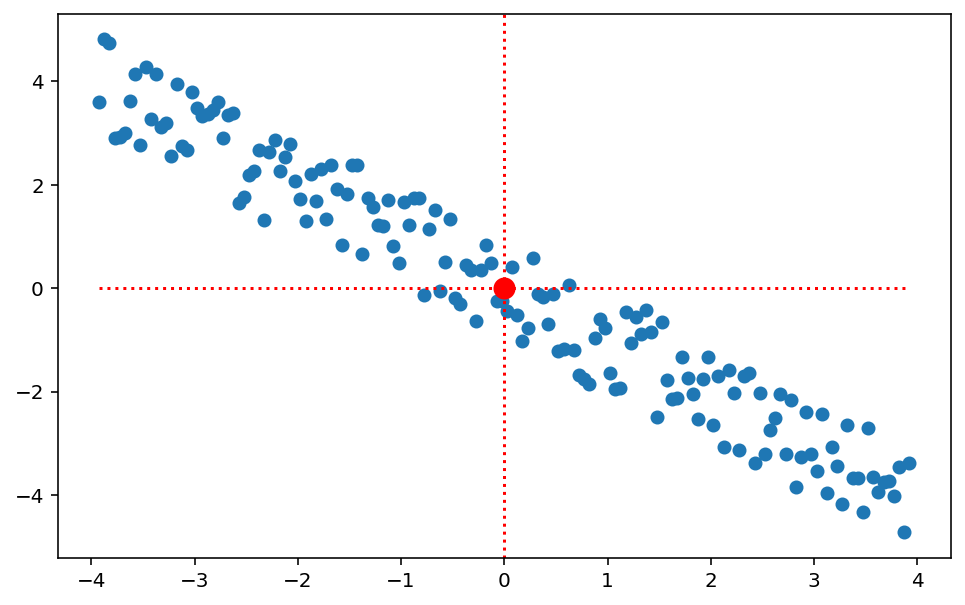

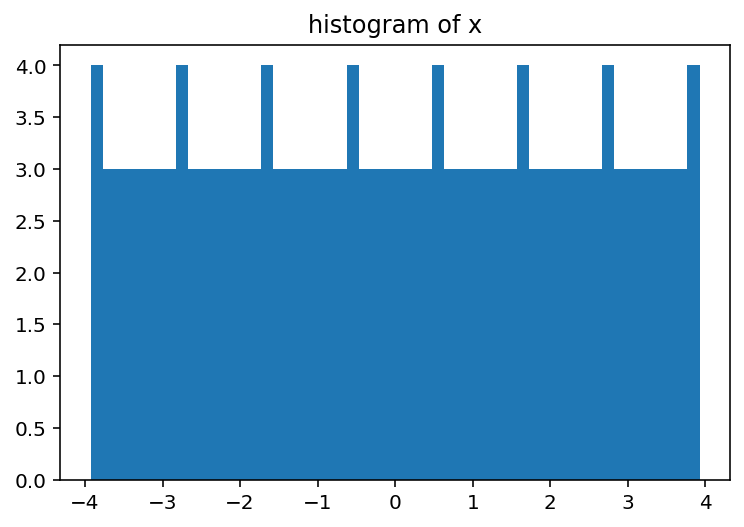

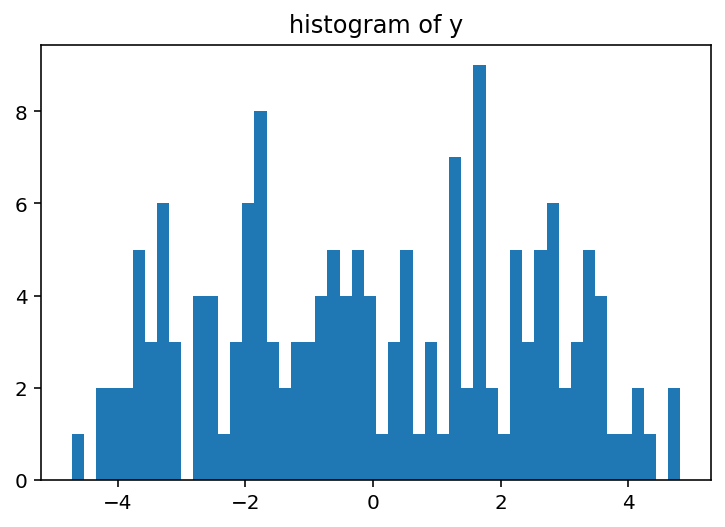

---------------------------------------------shift to std 1---------------------------------------------


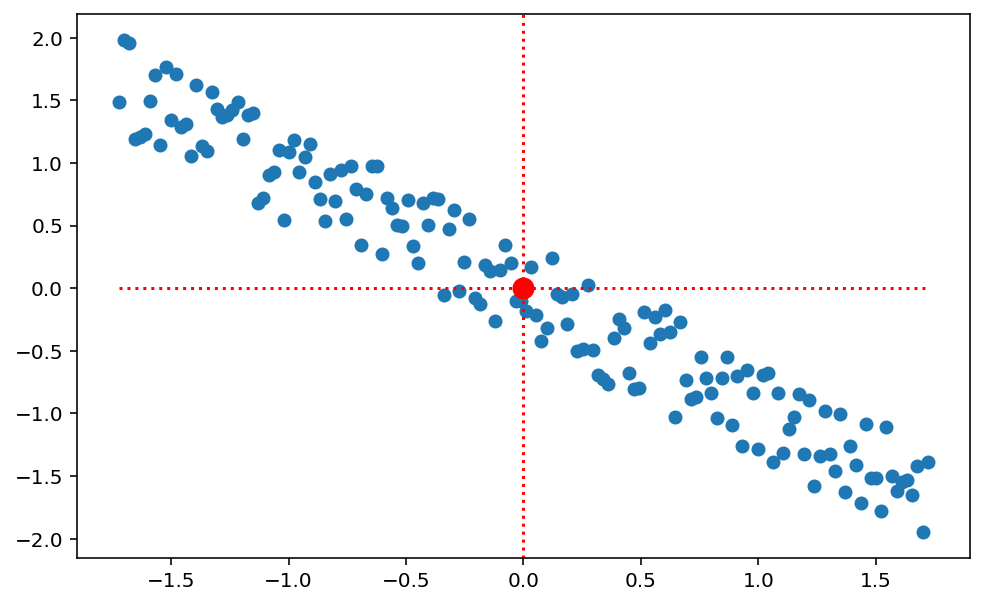

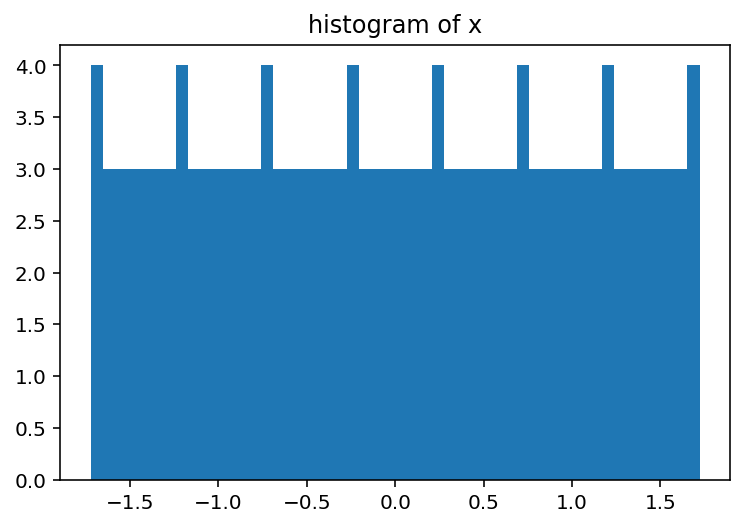

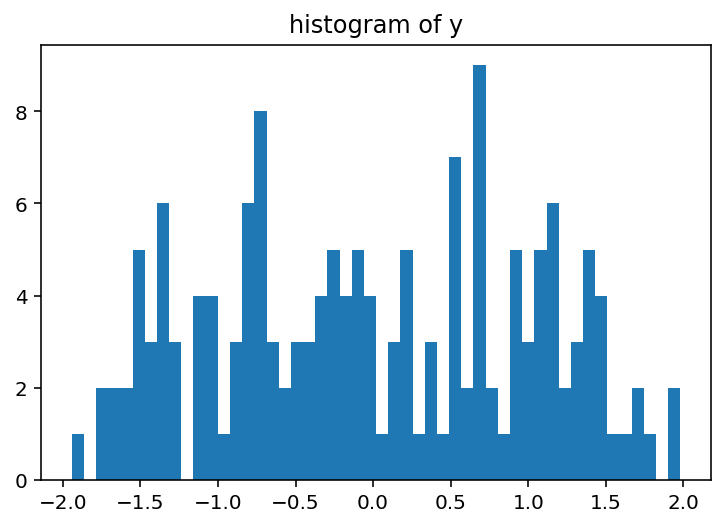

x mean:  -8.994211845064559e-17
y mean:  0.0
x standard deviation:  1.0
y standard deviation:  1.0000000000000002

---------
---------
---------
---------
---------First moment of product---------------------------------------------


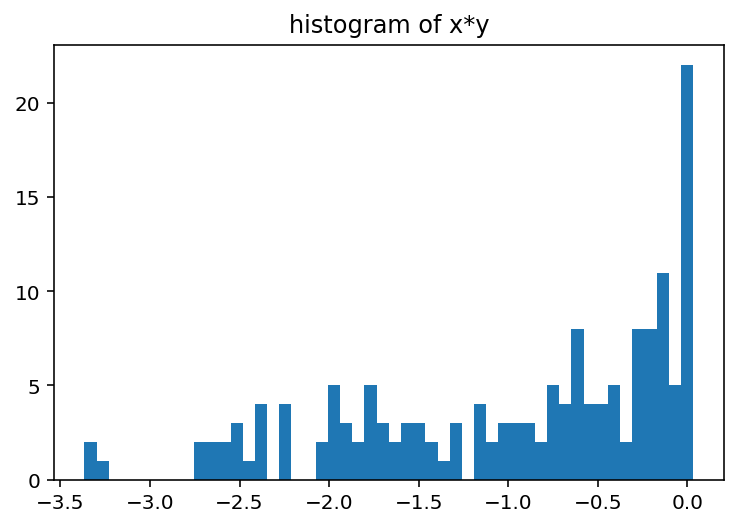

Expectation of first product moment:  -0.9702932967561368
correlation matrix:  [[ 1.        -0.9702933]
 [-0.9702933  1.       ]]


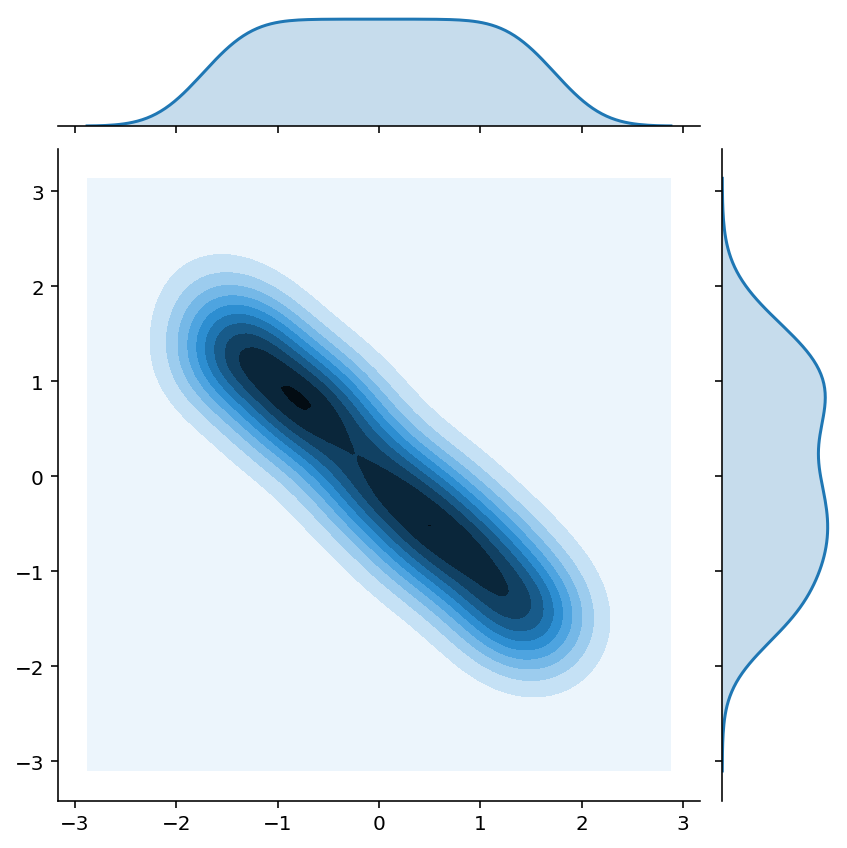

In [139]:
x = np.arange(0.1, 8, 0.05)
noise = np.random.random(size=x.shape[0])*2
y = -x + noise 

experiment(x, y)

<IPython.core.display.Javascript object>


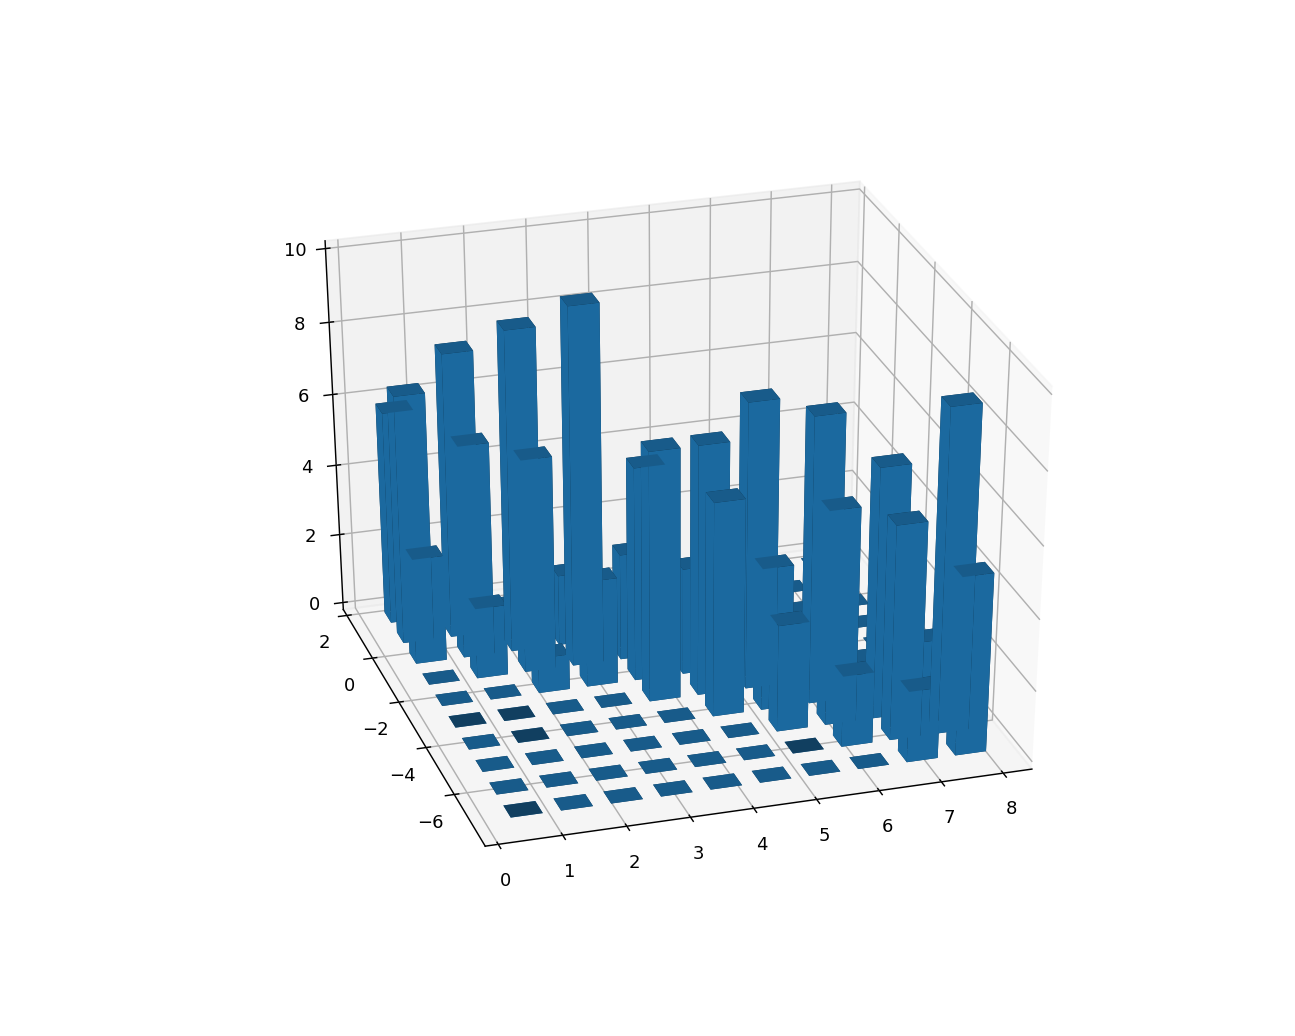

In [140]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[x.min(), x.max()], [y.min(), y.max()]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

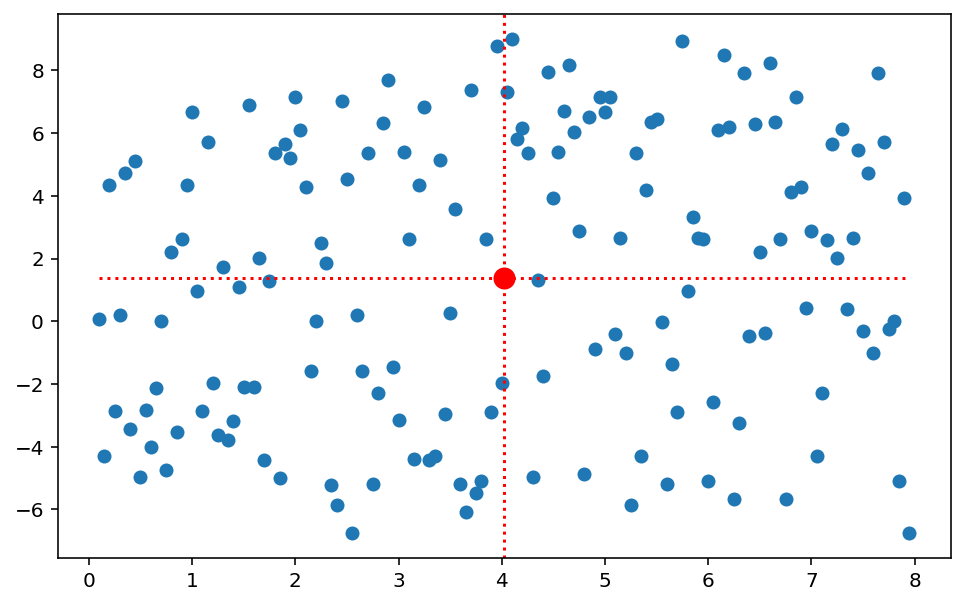

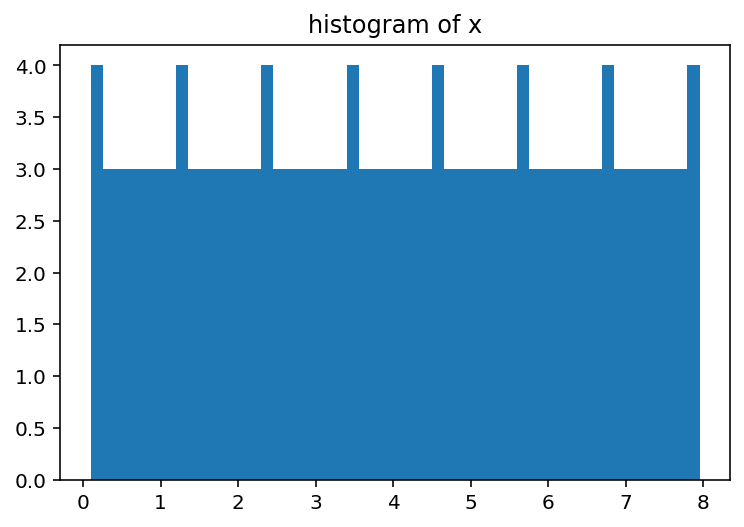

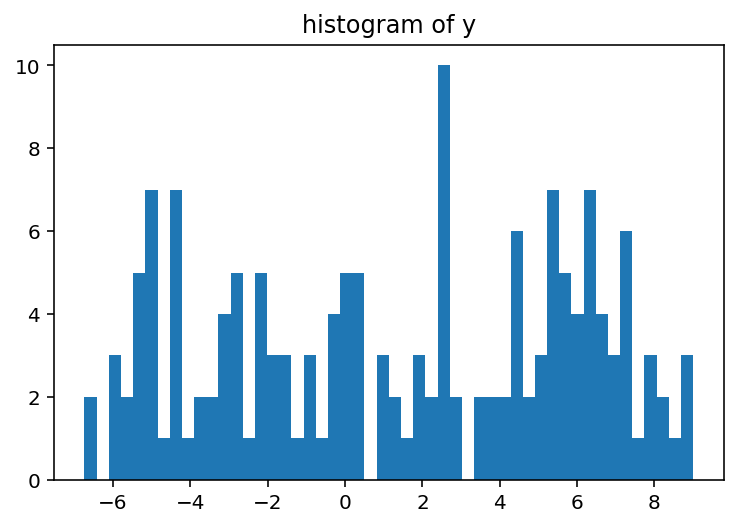

---------------------------------------------shift to mean 0---------------------------------------------


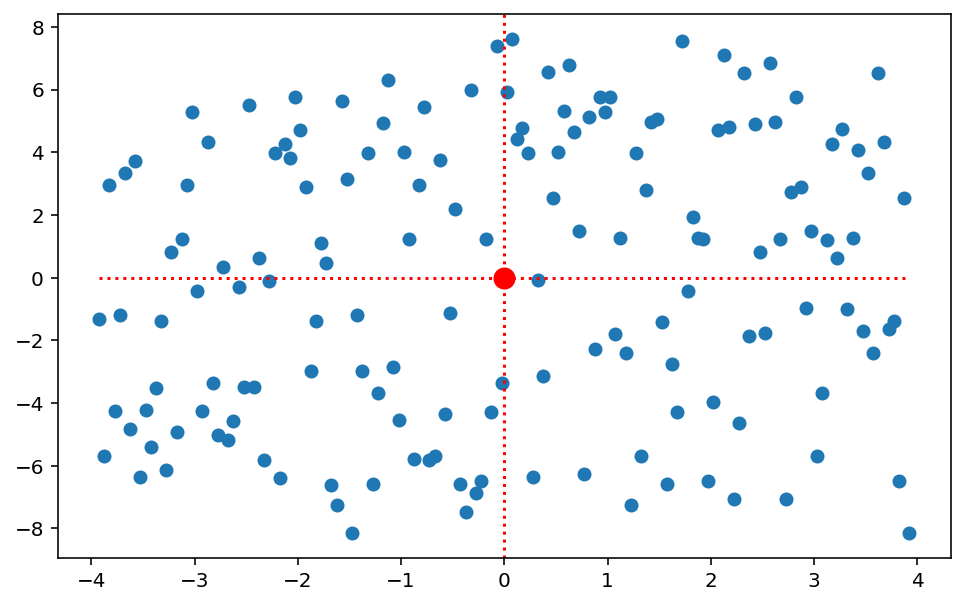

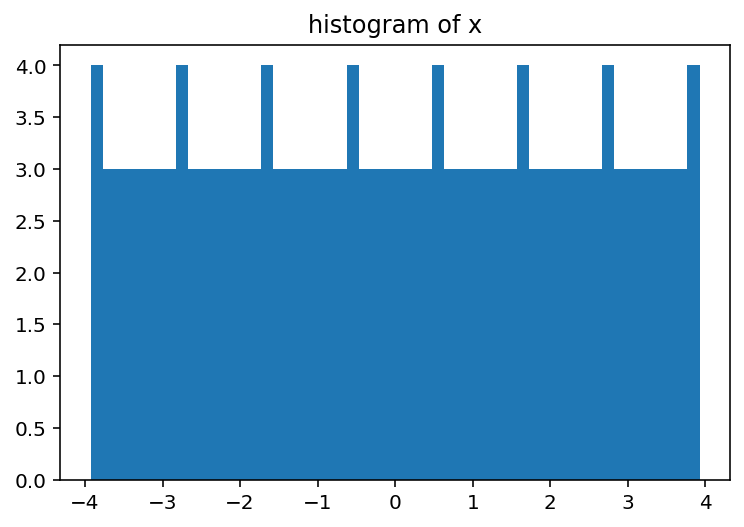

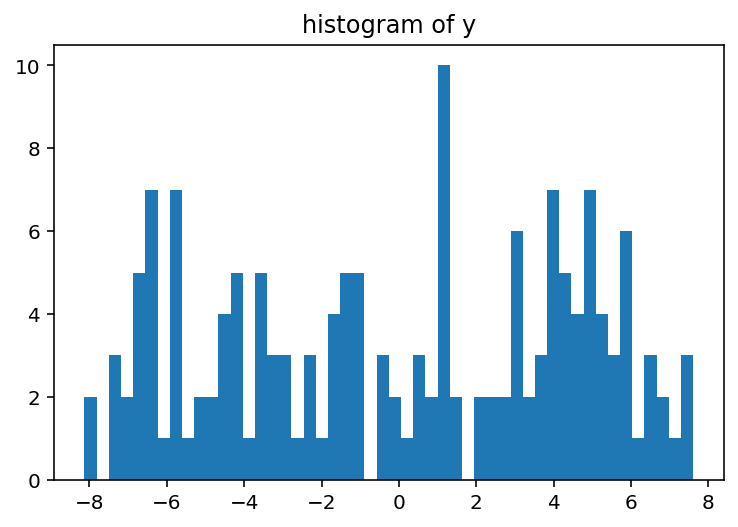

---------------------------------------------shift to std 1---------------------------------------------


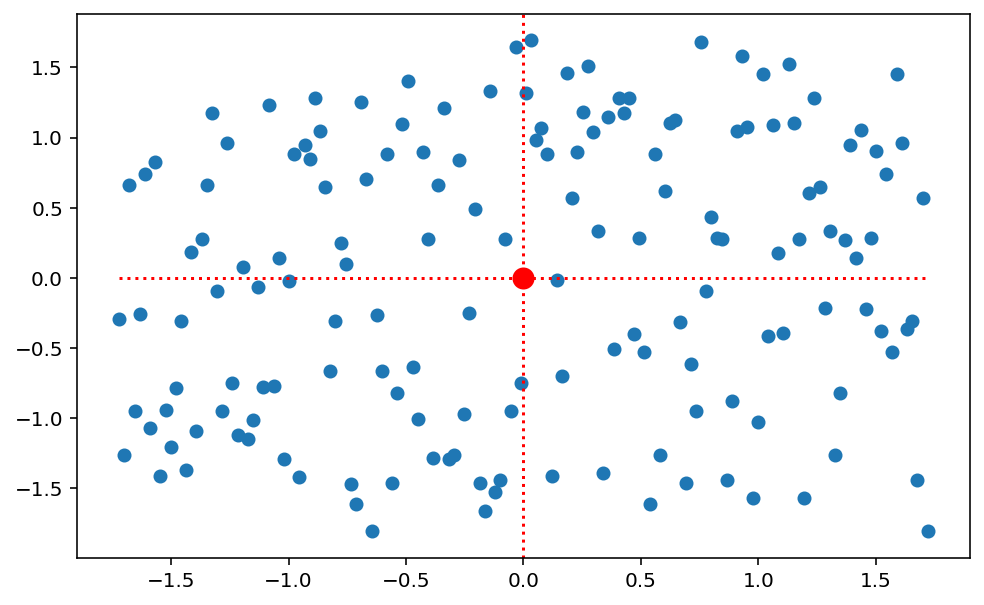

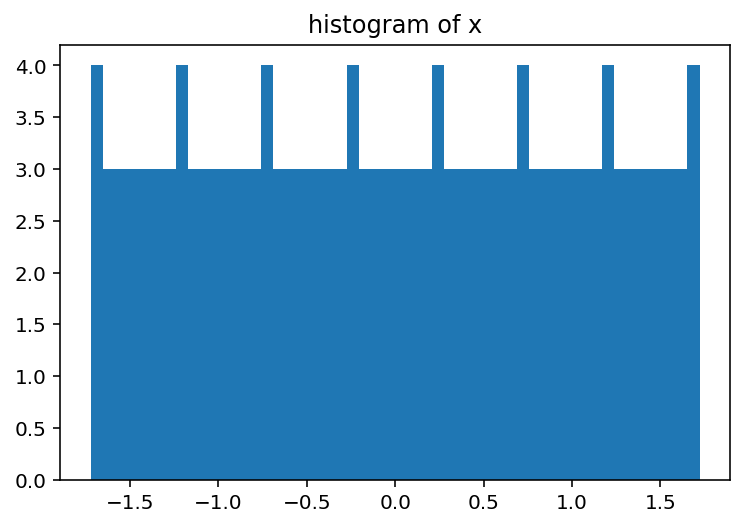

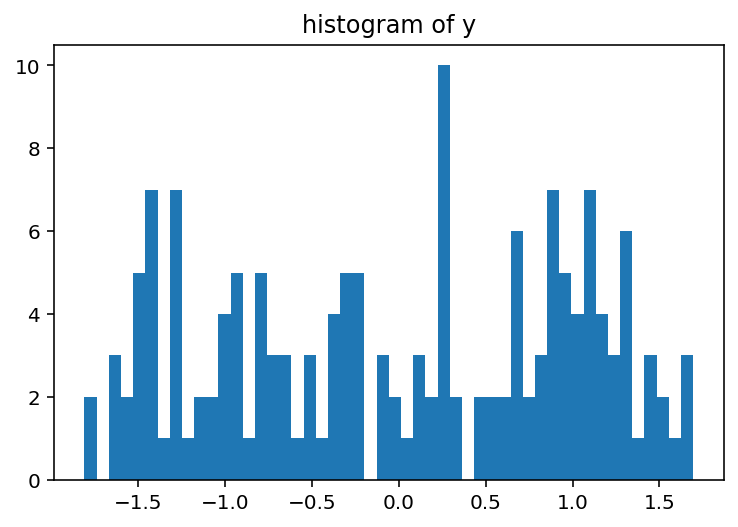

x mean:  -8.994211845064559e-17
y mean:  4.4971059225322796e-17
x standard deviation:  1.0
y standard deviation:  0.9999999999999999

---------
---------
---------
---------
---------First moment of product---------------------------------------------


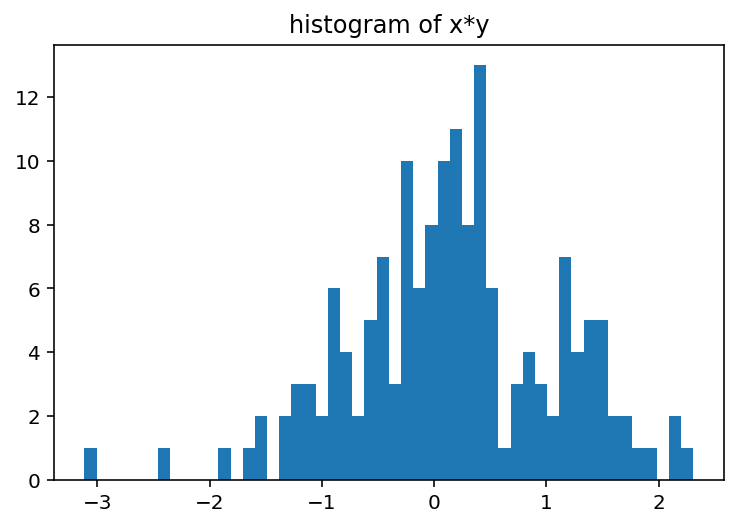

Expectation of first product moment:  0.1627496805900625
correlation matrix:  [[1.         0.16274968]
 [0.16274968 1.        ]]


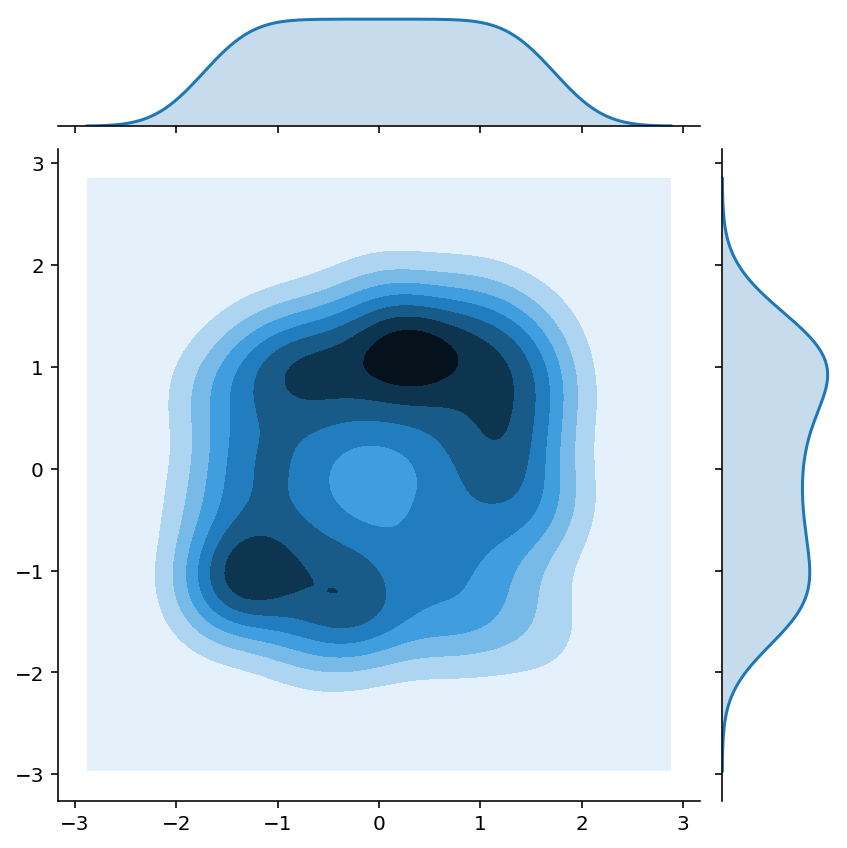

In [114]:
x = np.arange(0.1, 8, 0.05)
noise = np.random.random(size=x.shape[0])*2
y1 = -x + noise 
y2 = x + noise
y = np.random.choice(np.concatenate([y1, y2]), size=x.shape[0])
experiment(x, y)

A key takeaway from the above experiments is that the actual underlying histograms of $X$ and $Y$ are not the only thing of importance. In all experiments above they are relatively similar, but lead to incredibly different correlations. What is important is the **joint distribution**, i.e. how they vary together.

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[x.min(), x.max()], [y.min(), y.max()]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()